## Importing Packages

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.preprocessing  import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
import datetime 
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree

## Importing Data

In [36]:
data123 = pd.read_csv("Twitter-Absolute-Sigma-500.data", header=None)

In [37]:
data = data123.copy()
print(data.columns)
data.head()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
           dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


## Updating Column Names

In [38]:
collist = ['NCD','AI','AS(NA)','BL','NAC','AS(NAC)','CS','AT','NA','ADL','NAD']
i = 0
for j in range(len(collist)):
    for k in range(7):
        data.rename(columns={i:collist[j]+str('_')+str(k)}, inplace = True)
        i = i+1
        if(i > len(data.columns)-1):
            break
print(len(data.columns))
data.head()

78


,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


## Descriptive Info

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [40]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,77
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [41]:
X = data.drop(columns =[77])
y = data.iloc[:,[77]]
y= pd.DataFrame(y)
X.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,1.0,889,939,960,805,805,1143,1121
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,1.0,542,473,504,626,647,795,832
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,1.0,92,99,196,100,184,79,162
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,1.0,90,87,92,344,184,848,184
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,1.0,169,98,101,90,96,95,185


In [42]:
y.rename(columns = {77:'Predicted Buzz'}, inplace = 'True')
y.head()

,Predicted Buzz
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [43]:
data = pd.concat([X,y], axis =1 )
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Predicted Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [45]:
#np.random.seed(42)
#ind = np.random.randint(999, size = 1000)
#sample = data.iloc[ind,:]
#sample.reset_index(drop = True, inplace = True)
#sample.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Predicted Buzz
0,6,10,8,9,12,14,11,6,8,6,...,1.00,1.181818,6,10,8,9,12,14,11,0.0
1,33,38,28,9,22,55,107,16,10,8,...,1.00,1.000000,33,38,28,9,22,55,107,0.0
2,10,12,8,36,13,19,14,2,4,5,...,1.00,1.000000,10,12,8,36,13,19,14,0.0
3,36,47,50,206,52,91,107,24,23,40,...,1.00,1.027778,36,47,50,206,52,91,108,0.0
4,28,9,12,22,8,25,14,18,9,11,...,1.12,1.533333,28,9,13,23,8,25,15,0.0


In [44]:
#X.head()
X.shape

(140707, 77)

## Spliting Dataset

In [45]:
from sklearn.model_selection import train_test_split

X_train_org1, XS, y_train1, ys = train_test_split(X, y, shuffle = True, random_state = 42,test_size = 0.1)

In [46]:
XS.shape
ys.shape

(14071, 1)

In [69]:
#XS = sample.drop(columns = ['Predicted Buzz'])
#ys = sample['Predicted Buzz']
#ys = pd.DataFrame(ys)
#XS.head()
#XS.shape

(1000, 77)

In [61]:
#print(XS.shape)
#print(ys.shape)

(1000, 77)
(1000, 1)


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train_org, X_test_org, y_train, y_test = train_test_split(XS,ys, random_state = 42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [48]:
y_train.head()

,Predicted Buzz
92678,0.0
27028,0.0
137812,1.0
37975,1.0
50043,1.0


In [49]:
print(X_train.shape)
print(y_train.shape)

(10553, 77)
(10553, 1)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


## Hard Voting 

In [51]:
log_clf = LogisticRegression(penalty='l1',  C = 0.1)
log_clf.fit(X_train, y_train.values.reshape((-1,)))
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(X_train, y_train.values.reshape((-1,)))

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train.values.reshape((-1,)))

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train.values.reshape((-1,)))
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9206935758953951
KNeighborsClassifier 0.9607731665719159
VotingClassifier 0.9192723138146675


C:\Users\barun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Soft voting 

In [52]:
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(X_train, y_train.values.reshape((-1,)))
svm_clf = SVC(C = 0.010, probability = True)
svm_clf.fit(X_train,y_train.values.reshape((-1,)))


voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train.values.reshape((-1,)))

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train.values.reshape((-1,)))
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9206935758953951
KNeighborsClassifier 0.9607731665719159
SVC 0.8143831722569642
VotingClassifier 0.9638999431495168


C:\Users\barun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 4,random_state=42)
bag_clf = BaggingClassifier(dt_clf, n_estimators=400, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train.values.reshape((-1,)))
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

from  sklearn.metrics import accuracy_score
print('Accuracy: '+ str(accuracy_score(y_test, y_pred)))

#tree_clf = DecisionTreeClassifier(random_state=42)
#tree_clf.fit(X_train, y_train)
#y_pred_tree = tree_clf.predict(X_test)

#print(accuracy_score(y_test, y_pred_tree))

Train score: 0.97
Test score: 0.97
Accuracy: 0.9656054576463899


In [24]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=30, random_state=42)
bag_clf = BaggingClassifier(dt_clf, n_estimators=400, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
#print(accuracy_score(y_test, y_pred))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))


Accuracy: 0.97
Train score: 0.97
Test score: 0.97


In [58]:
svm_clf = SVC(C = 0.010, probability = True)
bag_clf = BaggingClassifier(svm_clf, n_estimators=400, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train.values.reshape((-1,)))
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train score: 0.96
Test score: 0.96
Accuracy: 0.96


## Pasting

In [59]:
dt_clf = DecisionTreeClassifier(max_depth = 4,random_state=42)
bag_clf = BaggingClassifier(dt_clf, n_estimators=400, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train.values.reshape((-1,)))
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train score: 0.97
Test score: 0.97
Accuracy: 0.97


In [60]:
svm_clf = SVC(C = 0.010, probability = True)
bag_clf = BaggingClassifier(svm_clf, n_estimators=400, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train.values.reshape((-1,)))
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train score: 0.96
Test score: 0.96
Accuracy: 0.96


## AdaBoosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train,y_train.values.reshape((-1,)))
print("Train score: {:.2f}".format(ada_clf.score(X_train, y_train)))
print("Test score: {:.2f}".format(ada_clf.score(X_test, y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train score: 1.00
Test score: 0.97
Accuracy: 0.97


In [63]:
ada_clf = AdaBoostClassifier(LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train,y_train.values.reshape((-1,)))
print("Train score: {:.2f}".format(ada_clf.score(X_train, y_train)))
print("Test score: {:.2f}".format(ada_clf.score(X_test, y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train score: 0.83
Test score: 0.84
Accuracy: 0.97


## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train,y_train.values.reshape((-1,)))
print("Train score: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Test score: {:.2f}".format(gbrt.score(X_test, y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train score: 0.98
Test score: 0.96
Accuracy: 0.97


## Deep Learning Model

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(77, input_dim=77, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\SDO\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
10553/10553 [==============================] - 1s 101us/step - loss: 0.0803 - acc: 0.9671
Epoch 2/100
10553/10553 [==============================] - 1s 90us/step - loss: 0.0818 - acc: 0.9666
Epoch 3/100
10553/10553 [==============================] - 1s 85us/step - loss: 0.0810 - acc: 0.9670
Epoch 4/100
10553/10553 [==============================] - 1s 95us/step - loss: 0.0821 - acc: 0.9669
Epoch 5/100
10553/10553 [==============================] - 1s 88us/step - loss: 0.0813 - acc: 0.9669
Epoch 6/100
10553/10553 [==============================] - 1s 86us/step - loss: 0.0813 - acc: 0.9670
Epoch 7/100
10553/10553 [==============================] - 1s 139us/step - loss: 0.0809 - acc: 0.9671
Epoch 8/100
10553/10553 [==============================] - 1s 97us/step - loss: 0.0804 - acc: 0.9687: 0s - loss: 0.0841 -
Epoch 9/100
10553/10553 [==============================] - 1s 100us/step - loss: 0.0801 - acc: 0.9684
Epoch 10/100
10553/10553 [==============================] - 1s 95us

In [52]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3518/3518 [==============================] - 0s 57us/step

acc: 96.36%


In [53]:
y_predict = model.predict(X_test)
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10553/10553 [==============================] - 0s 24us/step

acc: 96.86%


## Principal Component Analysis 

In [18]:
XS.shape

(14071, 77)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(XS)
pca.n_components_

3

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, ys,shuffle=True,test_size=0.3, random_state= 30)


In [22]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = pd.DataFrame(Scaler.fit_transform(X_train))
X_test = pd.DataFrame(Scaler.fit_transform(X_test))


In [24]:
X_train.shape
X_test.shape

(9849, 3)

### Defined the funtion to perform KNN, Polynomial, Decision Tree and SVC Kernel(Linear) classification using Grid Search and used Precision as coefficient of determination, And calculating the time elasped as well.

In [113]:
def evalknnpol(regressor,degree,parameters,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    scoresum = []
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    train_score = grid_train.cv_results_['mean_test_score']
    
    for k in parameters.keys():
        
        for i,j in enumerate(parameters[k]):
            print("The mean of roc_auc score for degree "+str(j)+" for cv = "+ str(cv)+" : "+ str(train_score[i]))
    
    #t0 = time.time()
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    #t1 = time.time()
    print('\n')
    print( " The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']

    for k in parameters.keys():
        
        for i,j in enumerate(parameters[k]):
            print("The mean of roc_auc score for degree "+str(j)+" for cv = "+ str(cv)+" : "+ str(test_score[i]))
    
    print('\n')
    print('Graph Evaluation:')
    
    g =[]
    for i in parameters.keys():
        g.append(i)
    
    for k in parameters.keys():
        
        plt.plot(parameters[k], train_score, c = 'g', label = 'Train Score')
        plt.plot(parameters[k], test_score, c = 'b', label = 'Test Score')
        plt.legend()
        plt.xlabel(k)
        if (g[0] == 'C'):
            plt.xscale('log')
    plt.show()
    
    
    y_predict = grid_search.predict(X_test)
    y_train_predict = grid_search.predict(X_train)
     
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    print('Train roc_auc_score: %.2f'%roc_auc_score(y_train_predict, y_train))
    print('Test roc_auc_score: %.2f '%roc_auc_score(y_predict, y_test))
    
    print('Train precision_score: %.2f'%precision_score(y_train_predict, y_train))
    print('Test precision_score: %.2f '%precision_score(y_predict, y_test))
    
    print('Train recall_score: %.2f'%recall_score(y_train_predict, y_train))
    print('Test recall_score: %.2f '%recall_score(y_predict, y_test))
    
    print('Train accuracy_score: %.2f'%accuracy_score(y_train_predict, y_train))
    print('Test accuracy_score: %.2f '%accuracy_score(y_predict, y_test))
    
     
    return;

### Defined the funtion to perform Logit and SVC Kernel (Polynomial) classification using Grid Search and used Precision as coefficient of determination, And calculating the time elasped as well.


In [114]:
def evallogit(regressor,parameters,lenpar,cross,cv,scoring):
        
    from sklearn.model_selection import GridSearchCV
    import time
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    
    train_score = grid_train.cv_results_['mean_test_score']
    print(train_score)
    trainscorel1 = train_score[0::2]

    trainscorel2 = train_score[1::2]
    
    
    #t0 = time.time()
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    #t1 = time.time()
    print('\n')
    print(" The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']
    print(test_score)
    
    testscorel1 = test_score[0::2]
    print(testscorel1)
    testscorel2 = test_score[1::2]
    print(testscorel2)
    #print(grid_test.grid_scores_)
    print('\n')
    print("Graph Evaluation:")
    
    t =[]
    for i,j in enumerate(parameters.keys()):
        t.append(j)
    

    plt.figure(figsize = (30,15))
    plt.plot(parameters['C'], trainscorel1, c = 'g', label = 'Train Score-'+str(t[0])+'1')
    plt.plot(parameters['C'], trainscorel2, c = 'b', label = 'Train Score-'+str(t[0])+'2')
    plt.plot(parameters['C'], testscorel1, c = 'r', label = 'Test Score-'+str(t[0])+'1')
    plt.plot(parameters['C'], testscorel2, c = 'k', label = 'Test Score-'+str(t[0])+'2')
    plt.legend()
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('roc_auc')
    plt.show()
    
    #param = list(parameters.keys())
    
    y_predict = grid_search.predict(X_test)
    y_train_predict = grid_search.predict(X_train)
     
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    print('Train roc_auc_score: %.2f'%roc_auc_score(y_train_predict, y_train))
    print('Test roc_auc_score: %.2f '%roc_auc_score(y_predict, y_test))
    
    print('Train precision_score: %.2f'%precision_score(y_train_predict, y_train))
    print('Test precision_score: %.2f '%precision_score(y_predict, y_test))
    
    print('Train recall_score: %.2f'%recall_score(y_train_predict, y_train))
    print('Test recall_score: %.2f '%recall_score(y_predict, y_test))
    
    print('Train accuracy_score: %.2f'%accuracy_score(y_train_predict, y_train))
    print('Test accuracy_score: %.2f '%accuracy_score(y_predict, y_test))
    
    return;

### Defined the funtion to perform RandomForest and SVC Kernel(rbf) classification using Grid Search and used Precision as coefficient of determination, And calculating the time elasped as well.

In [115]:
def evalsvmrand(regressor,parameters,lenpar,cross,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    
    train_score = grid_train.cv_results_['mean_test_score']
    print(train_score)
    
    trainscoreleaf1 = train_score[0::5]
    trainscoreleaf2 = train_score[1::5]
    trainscoreleaf3 = train_score[2::5]
    trainscoreleaf4 = train_score[3::5]
    trainscoreleaf5 = train_score[4::5]
    
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    #t0 = time.time()
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    #t1 = time.time()
    print('\n')
    print("The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']
    print(test_score)
    
    testscoreleaf1 = test_score[0::5]
    testscoreleaf2 = test_score[1::5]
    testscoreleaf3 = test_score[2::5]
    testscoreleaf4 = test_score[3::5]
    testscoreleaf5 = test_score[4::5]
    print('\n')
    print("Graph Evaluation:")
    
    g =[]
    for i in parameters.keys():
        g.append(i)
    
    plt.subplots(figsize =(25,20))
    plt.subplot(2,2,1)
    
    plt.plot(parameters[g[1]], trainscoreleaf1, c = 'g', label = 'TrainScore- '+str(g[0])+'-1')
    plt.plot(parameters[g[1]], testscoreleaf1, c = 'b', label = 'TestScore- '+str(g[0])+'-1')
    plt.plot(parameters[g[1]], trainscoreleaf2, c = 'r', label = 'TrainScore- '+str(g[0])+'-2')
    plt.plot(parameters[g[1]], testscoreleaf2, c = 'k', label = 'TestScore- '+str(g[0])+'-2')
    plt.plot(parameters[g[1]], trainscoreleaf3, c = 'c', label = 'TrainScore- '+str(g[0])+'-3')
    plt.plot(parameters[g[1]], testscoreleaf3, c = 'm', label = 'TestScore- '+str(g[0])+'-3')
    plt.plot(parameters[g[1]], trainscoreleaf4, c = 'k', label = 'TrainScore- '+str(g[0])+'-4')
    plt.plot(parameters[g[1]], testscoreleaf4, c = 'r', label = 'TestScore- '+str(g[0])+'-4')
    plt.plot(parameters[g[1]], trainscoreleaf5, c = 'maroon', label = 'TrainScore- '+str(g[0])+'-5')
    plt.plot(parameters[g[1]], testscoreleaf5, c = 'b', label = 'TestScore- '+str(g[0])+'-5')
    plt.legend()
    plt.xlabel('max_leaf_nodes')
    if (g[1] == 'C'):
        plt.xscale('log')
        plt.xlabel(g[1])
    plt.ylabel('roc_auc')

    
    plt.subplot(2,2,2)
    plt.plot(parameters[g[1]], trainscoreleaf1, c = 'g', label = 'TrainScore- '+str(g[0])+'-1')
    plt.plot(parameters[g[1]], testscoreleaf1, c = 'b', label = 'TestScore- '+str(g[0])+'-1')
    plt.plot(parameters[g[1]], trainscoreleaf2, c = 'r', label = 'TrainScore- '+str(g[0])+'-2')
    plt.plot(parameters[g[1]], testscoreleaf2, c = 'k', label = 'TestScore- '+str(g[0])+'-2')
    plt.legend()
    plt.xlabel('max_leaf_nodes')
    if (g[1] == 'C'):
        plt.xscale('log')
        plt.xlabel(g[1])
    plt.ylabel('roc_auc')
    
    
    plt.subplot(2,2,3)
    
    plt.plot(parameters[g[1]], trainscoreleaf3, c = 'g', label = 'TrainScore- '+str(g[0])+'-3')
    plt.plot(parameters[g[1]], testscoreleaf3, c = 'b', label = 'TestScore- '+str(g[0])+'-3')
    plt.plot(parameters[g[1]], trainscoreleaf4, c = 'r', label = 'TrainScore- '+str(g[0])+'-4')
    plt.plot(parameters[g[1]], testscoreleaf4, c = 'k', label = 'TestScore- '+str(g[0])+'-4')
    plt.legend()
    plt.xlabel('max_leaf_nodes')
    if (g[1] == 'C'):
        plt.xscale('log')
        plt.xlabel(g[1])
    plt.ylabel('roc_auc') 
    
    plt.subplot(2,2,4)
    plt.plot(parameters[g[1]], trainscoreleaf5, c = 'g', label = 'TrainScore- '+str(g[0])+'-5')
    plt.plot(parameters[g[1]], testscoreleaf5, c = 'b', label = 'TestScore- '+str(g[0])+'-5')
    plt.legend()
    plt.xlabel('max_leaf_nodes')
    if (g[1] == 'C'):
        plt.xscale('log')
        plt.xlabel(g[1])
    plt.ylabel('roc_auc')
    plt.show()
        
    y_predict = grid_search.predict(X_test)
    y_train_predict = grid_search.predict(X_train)
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    print('Train roc_auc_score: %.2f'%roc_auc_score(y_train_predict, y_train))
    print('Test roc_auc_score: %.2f '%roc_auc_score(y_predict, y_test))
    
    print('Train precision_score: %.2f'%precision_score(y_train_predict, y_train))
    print('Test precision_score: %.2f '%precision_score(y_predict, y_test))
    
    print('Train recall_score: %.2f'%recall_score(y_train_predict, y_train))
    print('Test recall_score: %.2f '%recall_score(y_predict, y_test))
    
    return;

## Evaluation Method
   1. Evaluation is done on basis of roc&auc score, precision score, accuracy score and reacall score.
   2. As we have a highly imbalanced data set with around 80% negative class (buzz =0) and around 20% positive class   (buzz=1),we decided precision will be an apt matric for finding the best model as it is not affected by high proportion of negative class in the dataset and also because of the fact that finding positive class(buzz=1) is little bit more important here at the cost of compromising little on missing out on few of the negative class values.


## KNeighbors Classifier

Grid Search Took 3.66 seconds, The results of the grid search on the train set is as below


The mean of roc_auc score for degree 1 for cv = 5 : 0.8778389032569778
The mean of roc_auc score for degree 5 for cv = 5 : 0.9100415384491457
The mean of roc_auc score for degree 10 for cv = 5 : 0.9183898129008653
The mean of roc_auc score for degree 15 for cv = 5 : 0.9123971346274277
The mean of roc_auc score for degree 20 for cv = 5 : 0.916463487248077


 The results of the grid search on the test set is as below


The mean of roc_auc score for degree 1 for cv = 5 : 0.8502970728263421
The mean of roc_auc score for degree 5 for cv = 5 : 0.8932993387384082
The mean of roc_auc score for degree 10 for cv = 5 : 0.9138864343615062
The mean of roc_auc score for degree 15 for cv = 5 : 0.9076576616792759
The mean of roc_auc score for degree 20 for cv = 5 : 0.922563840227866


Graph Evaluation:


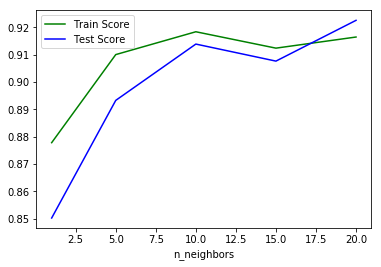

Train roc_auc_score: 0.94
Test roc_auc_score: 0.95 
Train precision_score: 0.87
Test precision_score: 0.85 
Train recall_score: 0.90
Test recall_score: 0.93 
Train accuracy_score: 0.96
Test accuracy_score: 0.96 


In [116]:
from sklearn.neighbors import KNeighborsClassifier

regressor = KNeighborsClassifier()
parameters = dict(n_neighbors = (1,5,10,15,20))
for i in parameters.keys():
    b = len(parameters[i])
evalknnpol(regressor,b,parameters,5,"precision")

### Evaluation Comment of KNeighborsClassifier
    KNN gave a high score in every scoring criteria, but to compare machine learning models we used precision score and it showed high train 87 and test score of 85

## Logistic Regression

Grid Search Took 7.01 seconds, The results of the grid search on the train set is as below


[0.         0.         0.99147828 1.         0.93897008 1.
 0.93068757 0.98674819 0.92948813 0.95902398]


 The results of the grid search on the test set is as below


[0.         0.         1.         0.         0.97083781 1.
 0.9278559  0.98942046 0.91749626 0.97002488]
[0.         1.         0.97083781 0.9278559  0.91749626]
[0.         0.         1.         0.98942046 0.97002488]


Graph Evaluation:


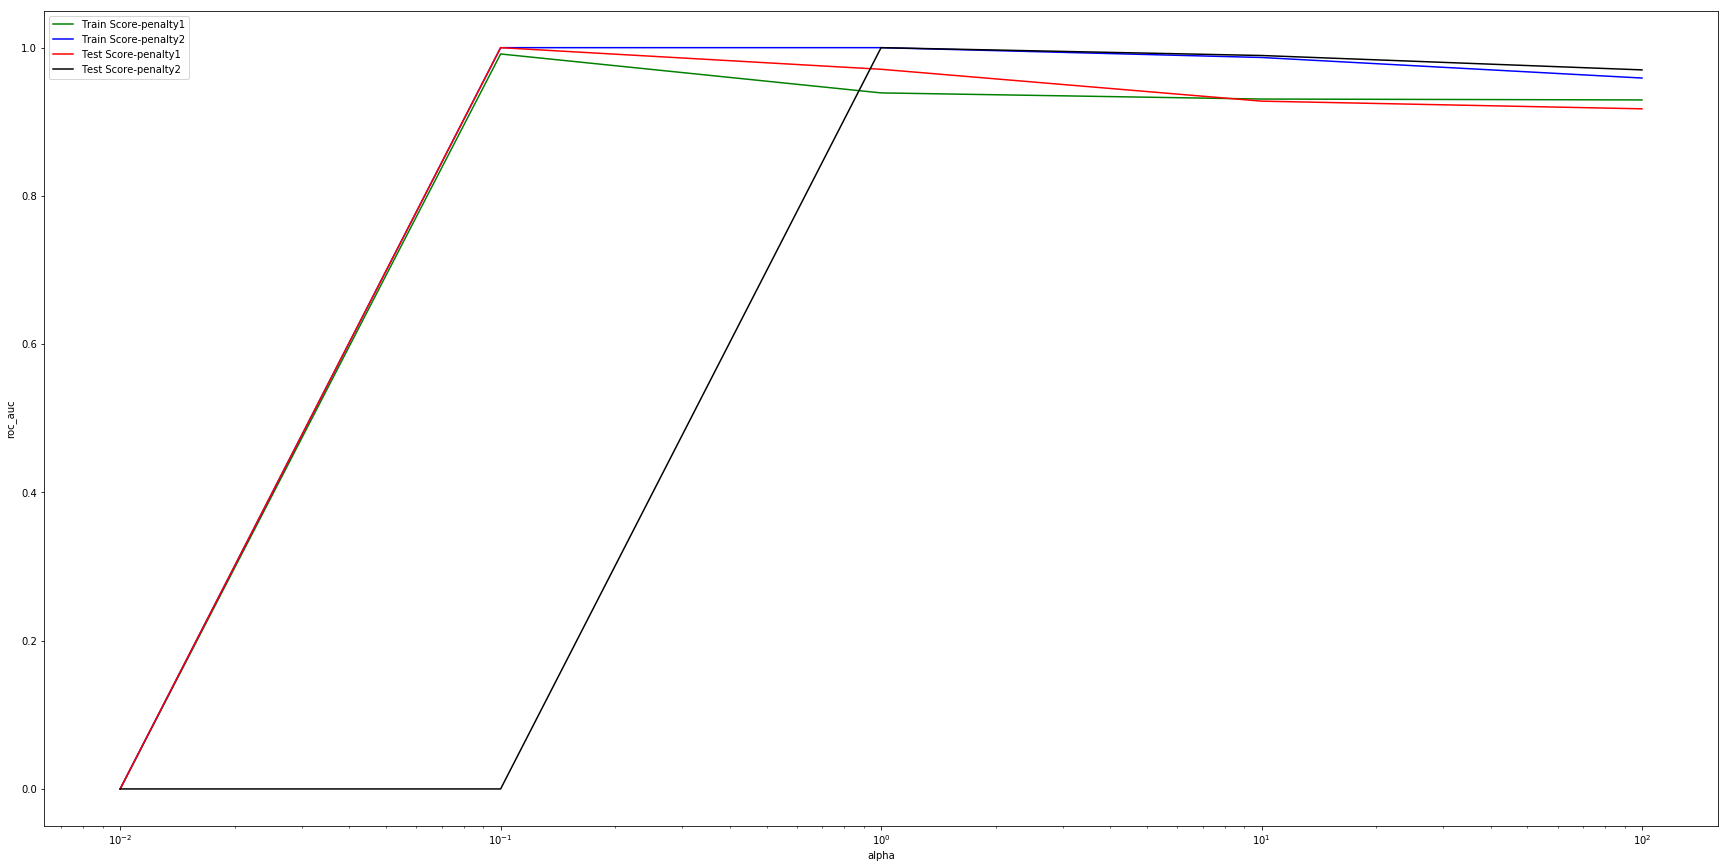

Train roc_auc_score: 0.94
Test roc_auc_score: 0.92 
Train precision_score: 0.39
Test precision_score: 0.18 
Train recall_score: 1.00
Test recall_score: 1.00 
Train accuracy_score: 0.88
Test accuracy_score: 0.85 


In [118]:
from sklearn.linear_model import LogisticRegression
import functools
import operator
regressor = LogisticRegression(penalty = 'l1', C = 0.1)
parameters = dict(penalty=('l1','l2'),C =(0.01, 0.1, 1, 10, 100))
b = []
for i, j in enumerate(parameters.keys()):
    b.append(len(parameters[j]))
c = functools.reduce(operator.mul,b,1)
evallogit(regressor,parameters,b,c,5,"precision")

### Evaluation Comment on LogisticRegression
    The model scored high in every scoring criteria but it performed poorly in Percision Score having a mere value of 0.39 in train and 0.18 in test.

## SVC Kernel (Linear)

Grid Search Took 9.27 seconds, The results of the grid search on the train set is as below


The mean of roc_auc score for degree 0.001 for cv = 5 : 0.0
The mean of roc_auc score for degree 0.01 for cv = 5 : 0.0
The mean of roc_auc score for degree 0.1 for cv = 5 : 1.0
The mean of roc_auc score for degree 1 for cv = 5 : 0.9956530353552189
The mean of roc_auc score for degree 10 for cv = 5 : 0.9684980132161646
The mean of roc_auc score for degree 100 for cv = 5 : 0.9393667132589852


 The results of the grid search on the test set is as below


The mean of roc_auc score for degree 0.001 for cv = 5 : 0.0
The mean of roc_auc score for degree 0.01 for cv = 5 : 0.0
The mean of roc_auc score for degree 0.1 for cv = 5 : 0.20014211274277593
The mean of roc_auc score for degree 1 for cv = 5 : 1.0
The mean of roc_auc score for degree 10 for cv = 5 : 0.9887004414618534
The mean of roc_auc score for degree 100 for cv = 5 : 0.9590342191284617


Graph Evaluation:


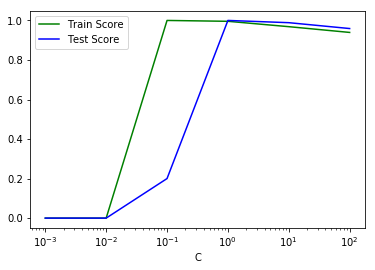

Train roc_auc_score: 0.91
Test roc_auc_score: 0.92 
Train precision_score: 0.15
Test precision_score: 0.15 
Train recall_score: 1.00
Test recall_score: 1.00 
Train accuracy_score: 0.83
Test accuracy_score: 0.84 


In [119]:
from sklearn.svm import SVC, LinearSVC
regressor = SVC(kernel='linear', C= 0.1)
parameters = dict(C = (0.001, 0.01, 0.1, 1,10, 100))
for i in parameters.keys():
    b = len(parameters[i])

evalknnpol(regressor,b,parameters,5,"precision")

### Evaluation Comment on SVC Kernel (Linear)
    The overall performance was good for this model specially in roc_auc score andn reacall scorebut performed badly in Percision Score.

## SVC Kernel (rbf)

Grid Search Took 54.28 seconds, The results of the grid search on the train set is as below


[0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.98784711 0.         0.19991877
 1.         0.99020502 0.95731391 0.19991877 1.         0.99019234
 0.95891372 0.93113172 1.         0.99019234 0.95954366 0.93208816
 0.92582948]


The results of the grid search on the test set is as below


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.97188516 0.         0.
 0.20014211 0.99043189 0.954472   0.         0.20014211 0.99005385
 0.97192649 0.94176165 0.20014211 0.99005385 0.98193189 0.94658259
 0.92144074]


Graph Evaluation:


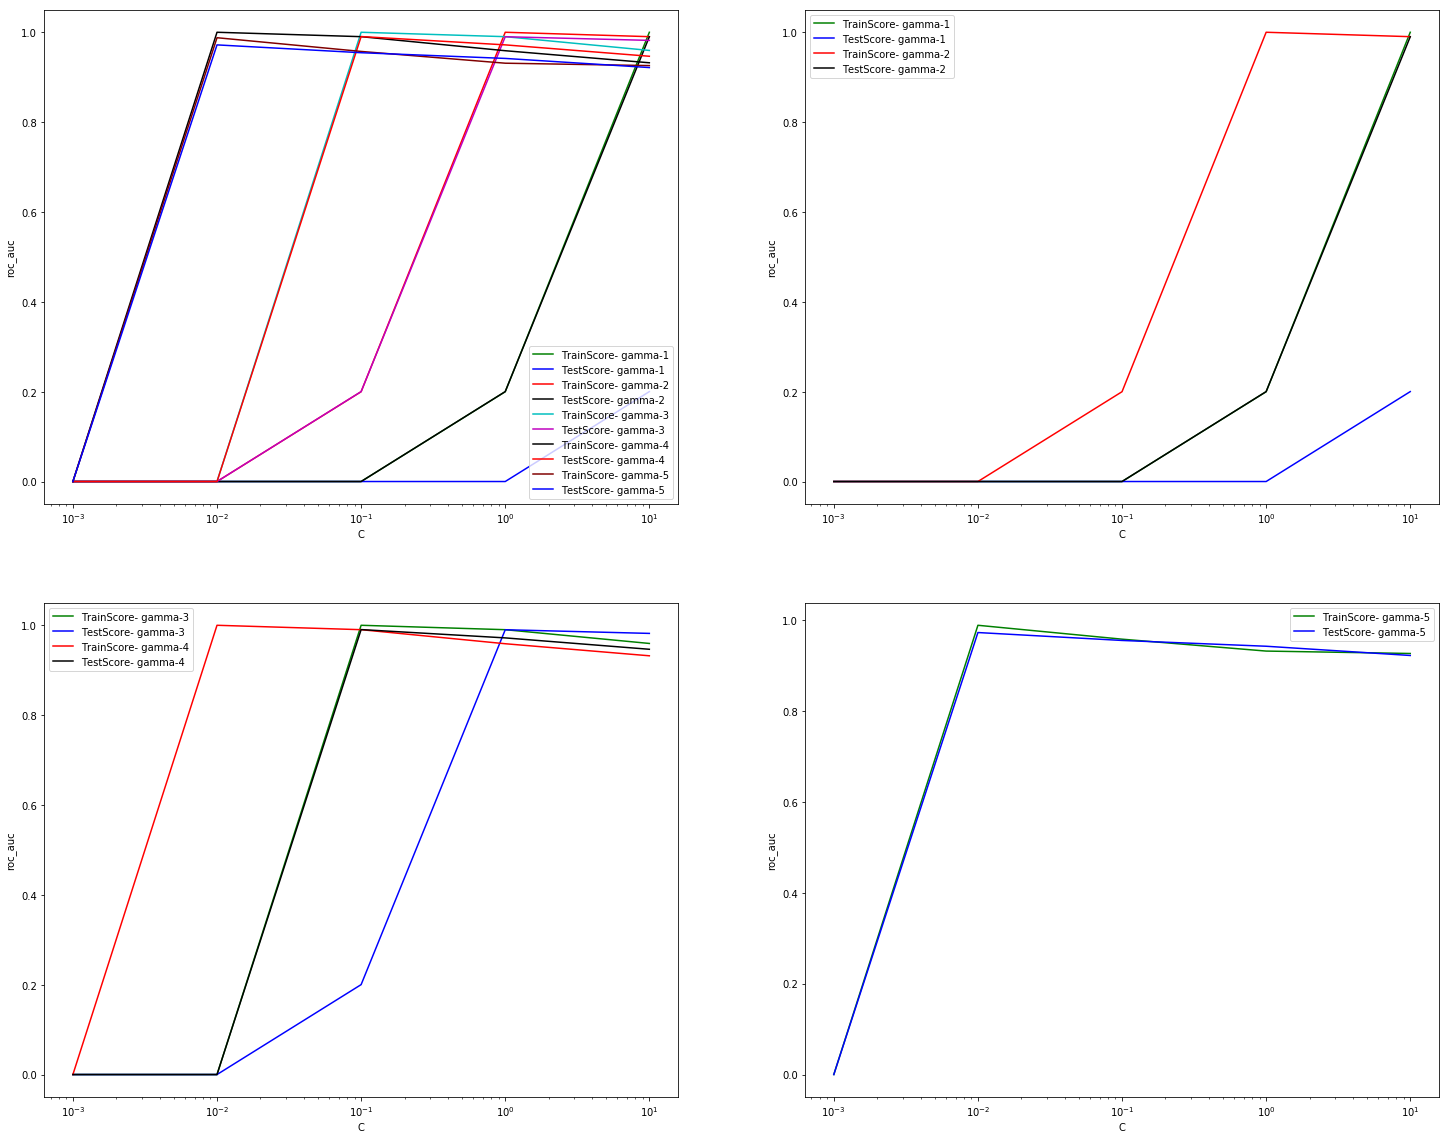

Train roc_auc_score: 0.93
Test roc_auc_score: 0.92 
Train precision_score: 0.33
Test precision_score: 0.31 
Train recall_score: 1.00
Test recall_score: 0.99 


In [120]:
from sklearn.svm import SVC, LinearSVC
import functools
import operator
regressor = SVC(kernel='rbf',C= 0.1, gamma = 0.1)
parameters = dict(gamma = (0.01, 0.1, 1, 10,100), C = (0.001, 0.01, 0.1, 1,10))
for i in parameters.keys():
    b = len(parameters[i])
b =[]
for i, j in enumerate(parameters.keys()):
    b.append(len(parameters[j]))
c = functools.reduce(operator.mul,b,1)
evalsvmrand(regressor,parameters,b,c,5,"precision")

### Evaluation Comment on SVC Kernel (rbf)
    Model did very by scoring 1 in test and train on recall score and was good across roc-auc but it performed bad in precision and scored only 0.33 and 0.31 respectivly in train and test.
    

## SVC Kernel (poly)

Grid Search Took 16.41 seconds, The results of the grid search on the train set is as below


[0.         0.         0.80008123 0.         1.         1.
 0.98427073 1.         0.94932172 0.9749436 ]


 The results of the grid search on the test set is as below


[0.         0.         0.         0.         1.         0.20014211
 0.99259356 1.         0.97227392 0.98578212]
[0.         0.         1.         0.99259356 0.97227392]
[0.         0.         0.20014211 1.         0.98578212]


Graph Evaluation:


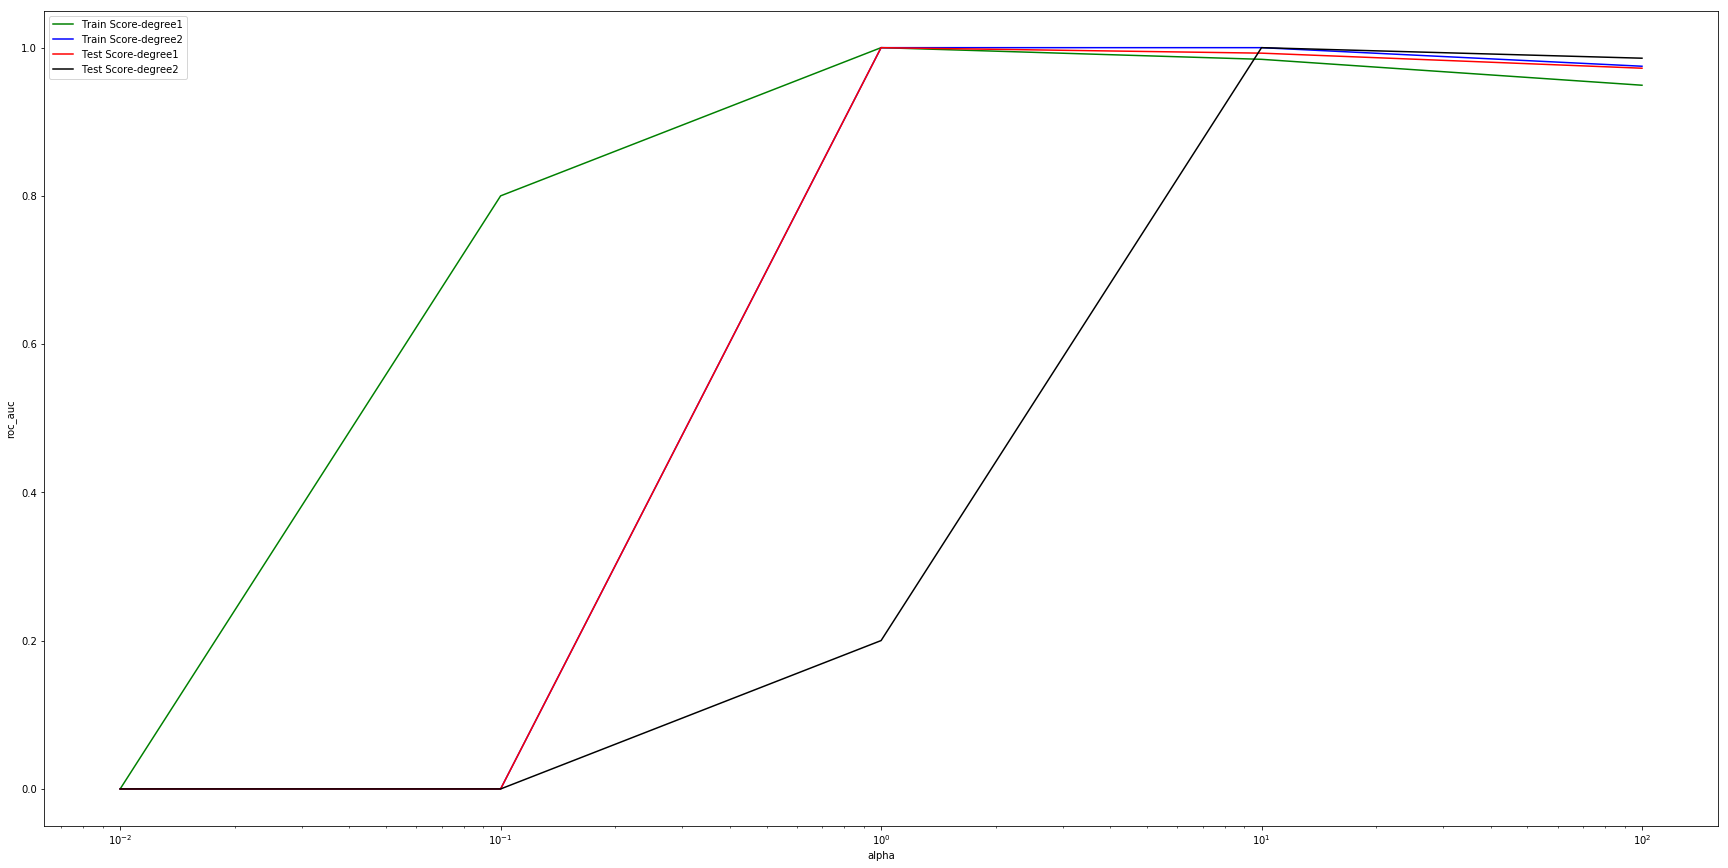

Train roc_auc_score: 0.91
Test roc_auc_score: 0.91 
Train precision_score: 0.04
Test precision_score: 0.02 
Train recall_score: 1.00
Test recall_score: 1.00 
Train accuracy_score: 0.81
Test accuracy_score: 0.82 


In [121]:
from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC
import functools
import operator
regressor = SVC(kernel = 'poly', C = 0.01, degree = 2)
parameters = dict(degree = (1,2),C = (0.01, 0.1, 1, 10, 100))
b =[]
for i, j in enumerate(parameters.keys()):
    #a = len(parameters[j])
    b.append(len(parameters[j]))  
c = functools.reduce(operator.mul,b,1)
evallogit(regressor,parameters,b,c,5,"precision")

### Evaluation Comment on the SVC Kernel Poly
    The model faired well in all scoring criteria specially in recall score and roc_auc but failed misreably scoring just 0.04 and 0.02.

## LinearSVC

Grid Search Took 5.03 seconds, The results of the grid search on the train set is as below


The mean of roc_auc score for degree 0.01 for cv = 5 : 0.8000812265204589
The mean of roc_auc score for degree 0.1 for cv = 5 : 1.0
The mean of roc_auc score for degree 1 for cv = 5 : 0.9870983915111008
The mean of roc_auc score for degree 10 for cv = 5 : 0.9522321216558445
The mean of roc_auc score for degree 100 for cv = 5 : 0.9395032477016688


 The results of the grid search on the test set is as below


The mean of roc_auc score for degree 0.01 for cv = 5 : 0.0
The mean of roc_auc score for degree 0.1 for cv = 5 : 1.0
The mean of roc_auc score for degree 1 for cv = 5 : 0.9926485583196046
The mean of roc_auc score for degree 10 for cv = 5 : 0.9708378858962636
The mean of roc_auc score for degree 100 for cv = 5 : 0.9440008465323881


Graph Evaluation:


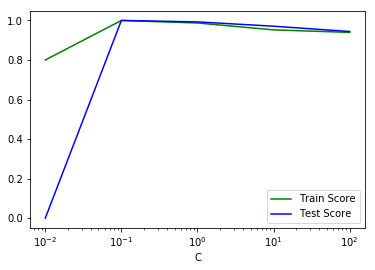

Train roc_auc_score: 0.91
Test roc_auc_score: 0.91 
Train precision_score: 0.05
Test precision_score: 0.04 
Train recall_score: 1.00
Test recall_score: 1.00 
Train accuracy_score: 0.82
Test accuracy_score: 0.82 


In [122]:
from sklearn.svm import SVC, LinearSVC
import functools
import operator
regressor = LinearSVC(C = 0.1)
parameters = dict(C =(0.01, 0.1, 1, 10, 100))
for i in parameters.keys():
    b = len(parameters[i])

evalknnpol(regressor,b,parameters,5,"precision")

### Evaluation Comment on Linear SVC 
    After running the model we observered that model faired in other scoring but failed in precision score which is 0.05 and 0.04 for train and test respectively.

## DecisionTreeClassifier

Grid Search Took 3.27 seconds, The results of the grid search on the train set is as below


The mean of roc_auc score for degree 1 for cv = 5 : 0.9028078356707703
The mean of roc_auc score for degree 5 for cv = 5 : 0.8959478382963846
The mean of roc_auc score for degree 10 for cv = 5 : 0.879067341168288
The mean of roc_auc score for degree 15 for cv = 5 : 0.8681579967764326
The mean of roc_auc score for degree 20 for cv = 5 : 0.8599888060109053


 The results of the grid search on the test set is as below


The mean of roc_auc score for degree 1 for cv = 5 : 0.8953356693467927
The mean of roc_auc score for degree 5 for cv = 5 : 0.8782549339612689
The mean of roc_auc score for degree 10 for cv = 5 : 0.8617448135039854
The mean of roc_auc score for degree 15 for cv = 5 : 0.8446473591942627
The mean of roc_auc score for degree 20 for cv = 5 : 0.8423798473031611


Graph Evaluation:


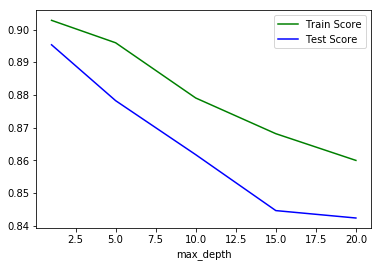

Train roc_auc_score: 0.87
Test roc_auc_score: 0.95 
Train precision_score: 0.99
Test precision_score: 0.88 
Train recall_score: 0.75
Test recall_score: 0.92 
Train accuracy_score: 0.93
Test accuracy_score: 0.96 


In [123]:
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier(max_depth=4, random_state=0)
parameters = dict(max_depth = (1,5,10,15,20))
for i in parameters.keys():
    b = len(parameters[i])
#print(b)
evalknnpol(regressor,b,parameters,5,"precision")

### Evaluation Comment on Decision Tree Classifier
    The model faired really well across all the scoring parameter even on precision score which was 0.99 on train and on test 0.88 which is good but not best among all other models present here.

## RandomForestClassifier

Grid Search Took 91.16 seconds, The results of the grid search on the train set is as below


[0.90343362 0.90424873 0.90387159 0.90427778 0.90432735 0.90571555
 0.90488536 0.90530518 0.90566518 0.90478544 0.90695097 0.90851624
 0.90846327 0.90799258 0.90799258 0.90791196 0.90707204 0.90796286
 0.90795885 0.90649791 0.90839649 0.90749831 0.9088598  0.90783312
 0.90844124]


The results of the grid search on the test set is as below


[0.89307334 0.8933131  0.89332996 0.89413748 0.89413748 0.89084682
 0.89200598 0.89197682 0.89206927 0.89421682 0.89193991 0.8919472
 0.89306045 0.89187359 0.89099123 0.8942778  0.89474395 0.89584086
 0.89120922 0.89131036 0.89792152 0.89681497 0.89557346 0.89706706
 0.89558269]


Graph Evaluation:


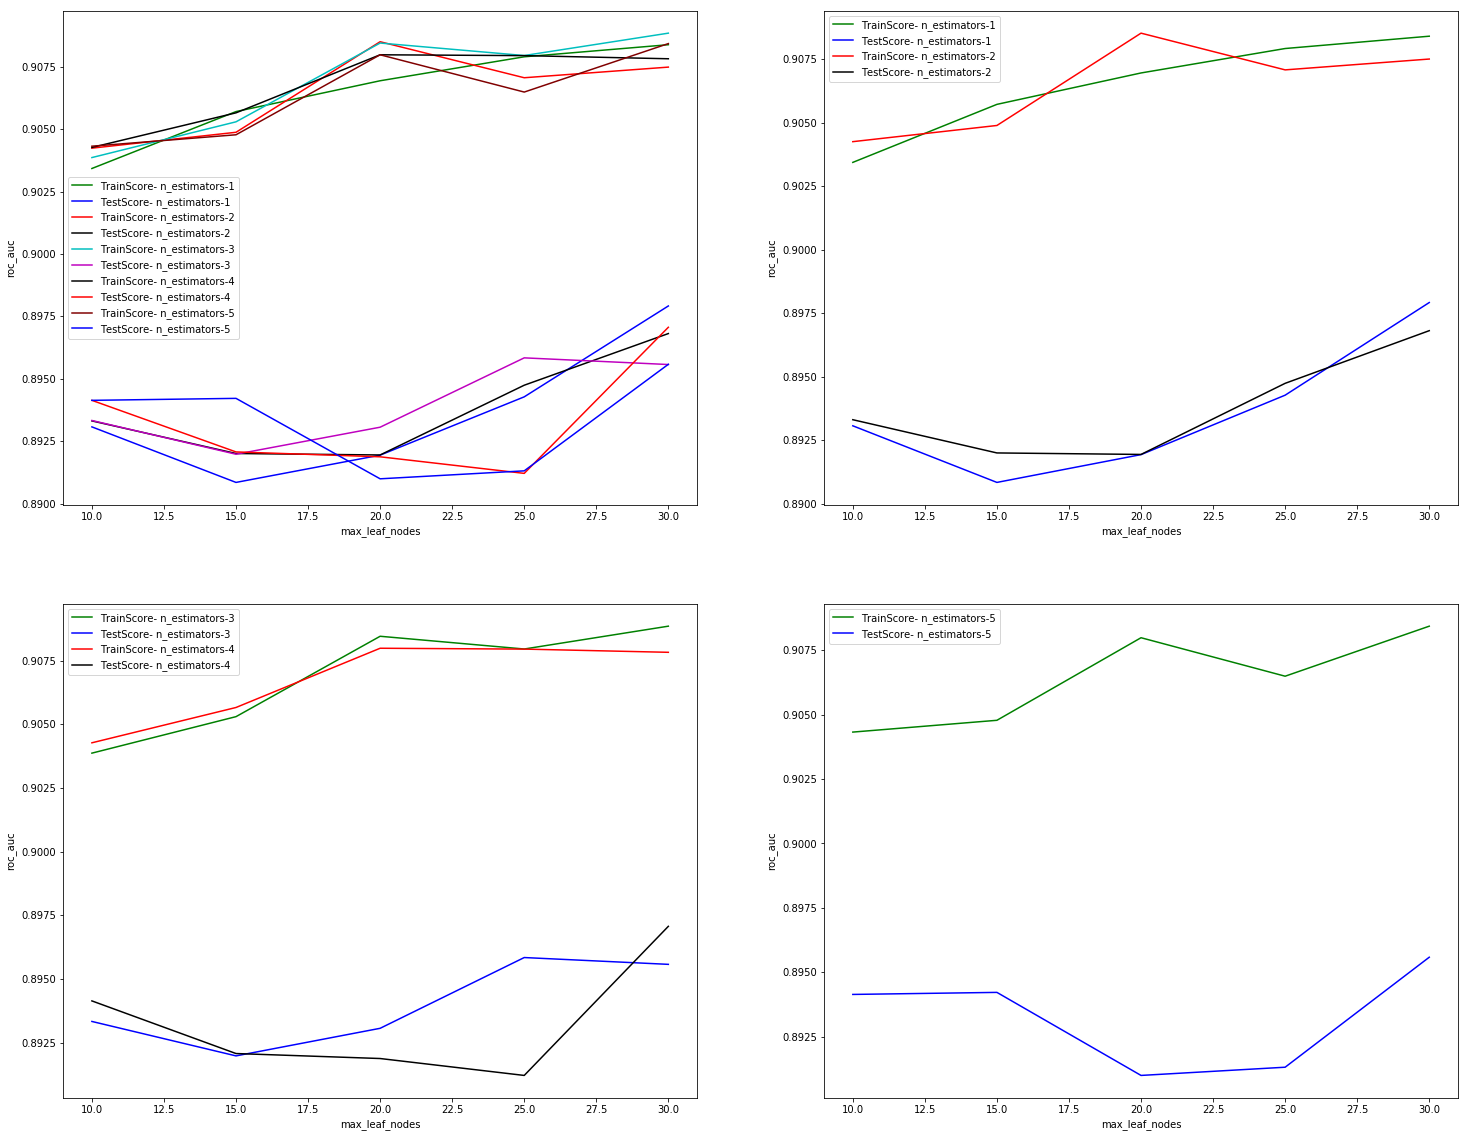

Train roc_auc_score: 0.89
Test roc_auc_score: 0.96 
Train precision_score: 0.97
Test precision_score: 0.92 
Train recall_score: 0.79
Test recall_score: 0.93 


In [124]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=300, max_leaf_nodes=15, n_jobs=-1, random_state=42)
parameters = dict(n_estimators = (100,200,300,400,500), max_leaf_nodes = (10,15,20,25,30))
b =[]
for i, j in enumerate(parameters.keys()):
    b.append(len(parameters[j]))
c = functools.reduce(operator.mul,b,1)
evalsvmrand(regressor,parameters,b,c,5,"precision")

### Evaluation on RandomForesst Regressor
    This model was best among all the other present al, It has the highest value for precision score which is 0.97 for training set and 0.92 for test dataset.So, we'll choose this model to run on whole dataset.

In [26]:
import pandas as pd
report_data = [['KNN',0.84, 0.85,'Degree 10',0.87, 0.85],['Logit',0.04, 0.05,'C=100 & Penlty= l2', 0.39 , 0.18 ],['SVC Kernel Linear',0.12, 0.12,'C = 0.01', 0.15, 0.15
],['Linear SVC',0.41, 0.39,'Degree 0.01',0.05, 0.04],
               ['SVC Kernel Poly ',0.17,0.18,'c=1 & degree 1',0.04, 0.02],['SVC Kernel rbf ',0.19, 0.18,'c= 0.1, gamma = 0.01', 0.33, 0.31],['Decision Tree', 0.88, 0.94,'Degree 15 and Max Depth 4', 0.99, 0.88],
               ['Random Forest',0.90, 0.96,'n_estimators=400, max_leaf_nodes=30 ', 0.97, 0.92]]
report_table = pd.DataFrame(report_data, columns=['Algorithm','Precision-Train-NonPCA','Precision-Test-NonPCA', 'Best Parameter', 'Precsion-Train-PCA', "Precision-Test-PCA"])
report_table

,Algorithm,Precision-Train-NonPCA,Precision-Test-NonPCA,Best Parameter,Precsion-Train-PCA,Precision-Test-PCA
0,KNN,0.84,0.85,Degree 10,0.87,0.85
1,Logit,0.04,0.05,C=100 & Penlty= l2,0.39,0.18
2,SVC Kernel Linear,0.12,0.12,C = 0.01,0.15,0.15
3,Linear SVC,0.41,0.39,Degree 0.01,0.05,0.04
4,SVC Kernel Poly,0.17,0.18,c=1 & degree 1,0.04,0.02
5,SVC Kernel rbf,0.19,0.18,"c= 0.1, gamma = 0.01",0.33,0.31
6,Decision Tree,0.88,0.94,Degree 15 and Max Depth 4,0.99,0.88
7,Random Forest,0.90,0.96,"n_estimators=400, max_leaf_nodes=30",0.97,0.92


## Conclusion

**KNN, Logit, SVC Linear Kernel,SVC rbf kernel, Decision Tree and Random forest classification models** give better results on the PCA transformed data set where as **Linear SVC and SVC poly kernel models** perform better on the original non - transformed data.